In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

In [2]:
%load_ext watermark

In [3]:
%watermark -h -v -m -p pandas,numpy,matplotlib

CPython 3.5.2
IPython 4.0.3

pandas 0.17.1
numpy 1.10.4
matplotlib 1.5.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : user-PC


In [4]:
pd.options.display.max_rows = 8

In [5]:
h5root = '..\\h5 files\\'
chartdir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\Charts\\'

In [6]:
h5subdir = 'WN001 Cl10 PJ_100N\\'
h5file = 'mm5_pjtest1.h5'

In [7]:
h5in = '%s%s%s' % (h5root, h5subdir, h5file)

In [8]:
indf = pd.read_hdf(h5in, 'orders')

### Cancels, Trades, Orders for Liquidity Providers

In [9]:
indf = indf.assign(trader_id = indf.order_id.str.split('_').str[0])
lp_df = indf.groupby(['trader_id','type']).quantity.count().unstack(level=-1)
lpsum_df = indf.groupby(['trader_id','type']).quantity.sum().unstack(level=-1)
lp_df, lpsum_df

(type          add  cancel
 trader_id                
 j0          60716    1869
 m0          66660   65323
 m1         499960  483279
 m2         100000   97855
 ...           ...     ...
 t96           877     NaN
 t97           416     NaN
 t98          4166     NaN
 t99           305     NaN
 
 [157 rows x 2 columns], type          add  cancel
 trader_id                
 j0          60716    1869
 m0         333300  324931
 m1         499960  483279
 m2         500000  486715
 ...           ...     ...
 t96           877     NaN
 t97           416     NaN
 t98          4166     NaN
 t99           305     NaN
 
 [157 rows x 2 columns])

In [10]:
lp_df[lp_df.index.str[0]=='p']['add'].describe(), lp_df[lp_df.index.str[0]=='p']['cancel'].describe()

(count       51.000000
 mean      9214.647059
 std      10596.170308
 min          2.000000
 25%       1909.000000
 50%       5000.000000
 75%      12500.000000
 max      50000.000000
 Name: add, dtype: float64, count       50.000000
 mean      9345.180000
 std      10559.293113
 min        368.000000
 25%       2047.500000
 50%       5413.500000
 75%      12425.500000
 max      49712.000000
 Name: cancel, dtype: float64)

In [12]:
indf2 = pd.read_hdf(h5in, 'trades')
indf2 = indf2.assign(trader_id = indf2.resting_order_id.str.split('_').str[0])
lt_df = pd.DataFrame(indf2.groupby(['trader_id']).quantity.count())
lt_df.rename(columns={'quantity': 'trade'}, inplace=True)
ltsum_df = pd.DataFrame(indf2.groupby(['trader_id']).quantity.sum())
ltsum_df.rename(columns={'quantity': 'trade_vol'}, inplace=True)
lt_df, ltsum_df

(           trade
 trader_id       
 j0         58845
 m0          4124
 m1         16516
 m2          6618
 ...          ...
 p6            72
 p7           144
 p8            47
 p9           116
 
 [56 rows x 1 columns],            trade_vol
 trader_id           
 j0             58845
 m0              8259
 m1             16516
 m2             13110
 ...              ...
 p6                72
 p7               144
 p8                47
 p9               116
 
 [56 rows x 1 columns])

In [13]:
both_count = pd.merge(lp_df, lt_df, how='right', left_index=True, right_index=True)
both_count = both_count.assign(cancel_to_trade = both_count['cancel']/both_count['trade'],
                               cancel_pct = 100*both_count['cancel']/both_count['add'],
                               trade_pct = 100*both_count['trade']/both_count['add'])
both_count, both_count.cancel_pct.min(), both_count.cancel_pct.max(), both_count.cancel_to_trade.min(), \
both_count.cancel_to_trade.max()

(type          add  cancel  trade  cancel_pct  cancel_to_trade  trade_pct
 trader_id                                                               
 j0          60716    1869  58845    3.078266         0.031761  96.918440
 m0          66660   65323   4124   97.994299        15.839719   6.186619
 m1         499960  483279  16516   96.663533        29.261262   3.303464
 m2         100000   97855   6618   97.855000        14.786189   6.618000
 ...           ...     ...    ...         ...              ...        ...
 p6          12500   12426     72   99.408000       172.583333   0.576000
 p7          25000   24849    144   99.396000       172.562500   0.576000
 p8           9090    9039     47   99.438944       192.319149   0.517052
 p9          16666   16546    116   99.279971       142.637931   0.696028
 
 [56 rows x 6 columns],
 3.0782660254298704,
 99.849849849849846,
 0.031761407086413458,
 464.0)

In [14]:
both_sum = pd.merge(lpsum_df, ltsum_df, how='right', left_index=True, right_index=True)
both_sum = both_sum.assign(trade_order_vol_pct = 100*both_sum['trade_vol']/both_sum['add'],
                           cancel_order_vol_pct = 100*both_sum['cancel']/both_sum['add'],
                           cancel_trade_vol = both_sum['cancel']/both_sum['trade_vol']
                          )
both_sum, both_sum.cancel_order_vol_pct.min(), both_sum.cancel_order_vol_pct.max(), both_sum.cancel_trade_vol.min(), \
both_sum.cancel_trade_vol.max()

(type          add  cancel  trade_vol  cancel_order_vol_pct  cancel_trade_vol  \
 trader_id                                                                      
 j0          60716    1869      58845              3.078266          0.031761   
 m0         333300  324931       8259             97.489049         39.342656   
 m1         499960  483279      16516             96.663533         29.261262   
 m2         500000  486715      13110             97.343000         37.125477   
 ...           ...     ...        ...                   ...               ...   
 p6          12500   12426         72             99.408000        172.583333   
 p7          25000   24849        144             99.396000        172.562500   
 p8           9090    9039         47             99.438944        192.319149   
 p9          16666   16546        116             99.279971        142.637931   
 
 type       trade_order_vol_pct  
 trader_id                       
 j0                   96.918440  
 m0  

### Durations

In [15]:
add = indf[indf['type']=='add'][['trader_id','order_id', 'timestamp']]
add.rename(columns={'timestamp': 'add_time'}, inplace=True)
cancel = indf[indf['type']=='cancel'][['trader_id','order_id', 'timestamp']]
cancel.rename(columns={'timestamp': 'cancel_time'}, inplace=True)
cancel

,trader_id,order_id,cancel_time
58,p8,p8_1,11
59,p26,p26_1,11
60,p27,p27_3,11
62,p32,p32_2,12
...,...,...,...
50979,p3,p3_9089,100000
50982,p22,p22_3030,100000
50983,p22,p22_3026,100000
51003,p18,p18_10000,100000


In [16]:
add_cancel = pd.merge(add, cancel, left_on='order_id', right_on='order_id')
add_cancel = add_cancel.assign(cancel_duration = add_cancel['cancel_time']-add_cancel['add_time'])
add_cancel

,trader_id_x,order_id,add_time,trader_id_y,cancel_time,cancel_duration
0,p27,p27_1,2,p27,124,122
1,p47,p47_1,3,p47,16,13
2,p26,p26_1,3,p26,11,8
3,p39,p39_1,3,p39,30,27
...,...,...,...,...,...,...
1197173,m1,m1_499939,99996,m1,99999,3
1197174,m1,m1_499948,99998,m1,99998,0
1197175,m1,m1_499949,99998,m1,99998,0
1197176,p18,p18_10000,100000,p18,100000,0


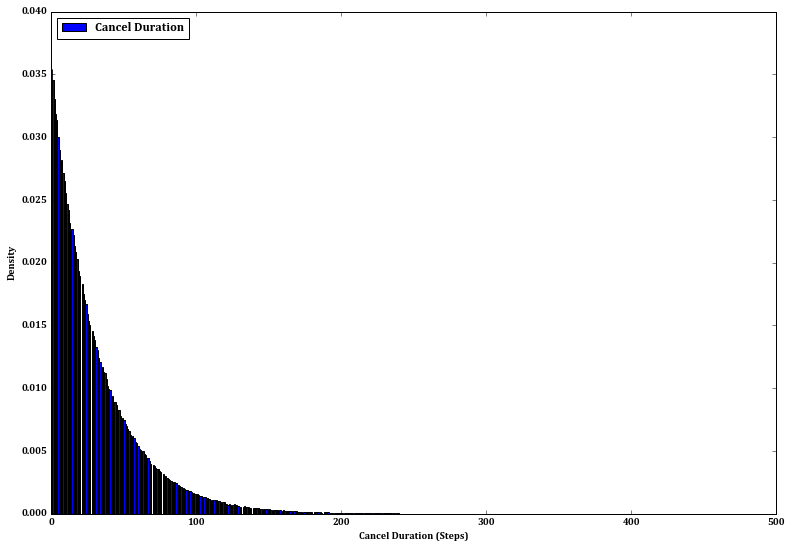

In [17]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(add_cancel.cancel_duration, bins=500, normed=True, label='Cancel Duration')
ax1.set_xlim(0, 500)
ax1.set_xlabel('Cancel Duration (Steps)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%scanceldur.png' % chartdir)
plt.show()

In [18]:
add_trade = pd.merge(add, indf2, left_on='order_id', right_on='resting_order_id')
add_trade = add_trade.assign(trade_duration = add_trade['timestamp']-add_trade['add_time'])
add_trade

,trader_id_x,order_id,add_time,incoming_order_id,price,quantity,resting_order_id,resting_timestamp,side,timestamp,trader_id_y,trade_duration
0,p6,p6_1,8,t10_1,999535,1,p6_1,8,buy,18,p6,10
1,j0,j0_1,10,t73_1,999534,1,j0_1,10,buy,18,j0,8
2,j0,j0_2,10,t30_1,999532,1,j0_2,10,sell,14,j0,4
3,j0,j0_3,14,t30_2,999532,1,j0_3,14,sell,21,j0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
94850,j0,j0_60712,99994,t73_11110,999623,1,j0_60712,99994,sell,99999,j0,5
94851,m1,m1_499927,99994,t41_2500,999622,1,m1_499927,99994,sell,100000,m1,6
94852,j0,j0_60713,99995,t71_2857,999624,1,j0_60713,99995,buy,99995,j0,0
94853,j0,j0_60715,99999,t60_160,999623,1,j0_60715,99999,sell,100000,j0,1


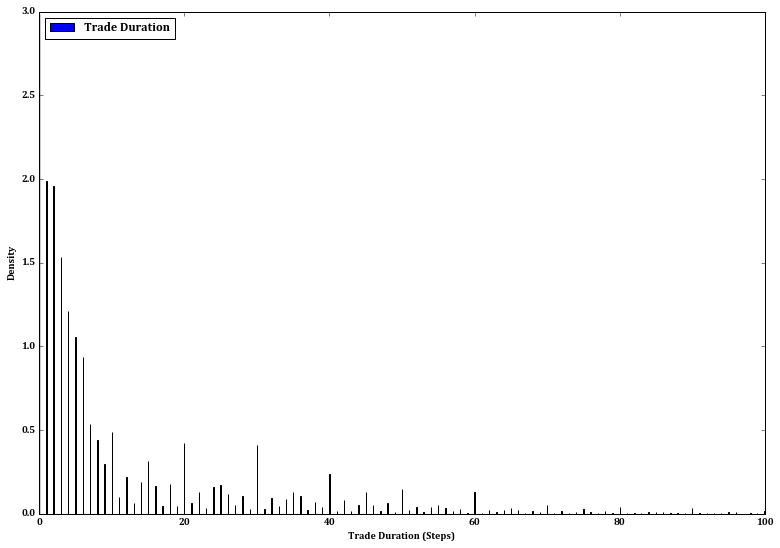

In [19]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(add_trade.trade_duration, bins=5000, normed=True, label='Trade Duration')
ax1.set_xlim(0, 100)
ax1.set_xlabel('Trade Duration (Steps)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%stradedur.png' % chartdir)
plt.show()

In [20]:
add_trade.trade_duration.describe(), add_cancel.cancel_duration.describe()

(count    94854.000000
 mean        12.682681
 std         20.226157
 min          0.000000
 25%          1.000000
 50%          4.000000
 75%         15.000000
 max        264.000000
 Name: trade_duration, dtype: float64, count    1197177.000000
 mean          31.668149
 std           32.322816
 min            0.000000
 25%            9.000000
 50%           22.000000
 75%           44.000000
 max          437.000000
 Name: cancel_duration, dtype: float64)